In [9]:
# imports
import pandas as pd
import numpy as np

from xgboost import XGBClassifier,XGBRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,r2_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
sonar_df = pd.read_csv(r'..\Cases\Sonar\Sonar.csv')
sonar_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [11]:
X= sonar_df.drop(columns=['Class'],axis=1)
y= sonar_df['Class']
le= LabelEncoder()
y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)
# y_train

In [12]:
n_estimate=[10,50,100,200]
lr=np.linspace(0.001,1,10)
depth=[1,2,3,4]
scores=[]
for n in n_estimate:
    for r in lr:
        for d in depth:
            gdb=XGBClassifier(n_estimators=n,learning_rate=r,max_depth=d,random_state=25)
            gdb.fit(X_train,y_train)
            # y_pred =ada.predict(X_test)
            y_pred_proba=gdb.predict_proba(X_test)
            scores.append([n,r,d,roc_auc_score(y_test,y_pred_proba[:,1])])
scores_df=pd.DataFrame(scores,columns=['n_estimate','Learning rate','Depth','roc_auc_score'])
scores_df.sort_values(by='roc_auc_score',ascending=False,inplace=True)
scores_df.head()

,n_estimate,Learning rate,Depth,roc_auc_score
98,100,0.445,3,0.921907
138,200,0.445,3,0.921907
93,100,0.334,2,0.920892
49,50,0.223,2,0.920892
89,100,0.223,2,0.920892


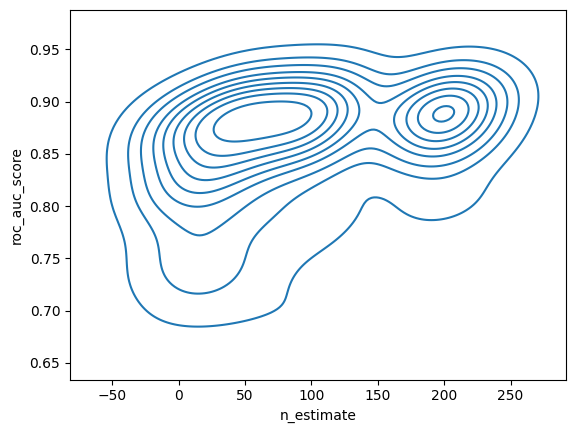

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x=scores_df['n_estimate'],y=scores_df['roc_auc_score'])
plt.show()

In [14]:
concrete_df = pd.read_csv(r'..\Cases\Concrete Strength\Concrete_Data.csv')
concrete_df.head()
X= concrete_df.drop(columns=['Strength'])
y= concrete_df['Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
n_estimate=[10,50,100,200]
lr=np.linspace(0.001,1,10)
depth=[1,2,3,4]
scores=[]
for n in n_estimate:
    for r in lr:
        for d in depth:
            gbr=XGBRegressor(n_estimators=n,learning_rate=r,max_depth=d,random_state=25)
            gbr.fit(X_train,y_train)
            # y_pred =ada.predict(X_test)
            y_pred=gbr.predict(X_test)
            scores.append([n,r,d,r2_score(y_test,y_pred)])
scores_df=pd.DataFrame(scores,columns=['n_estimate','Learning rate','Depth','r2_score'])
scores_df.sort_values(by='r2_score',ascending=False,inplace=True)
scores_df.head()

,n_estimate,Learning rate,Depth,r2_score
146,200,0.667,3,0.923145
106,100,0.667,3,0.922486
133,200,0.334,2,0.917710
142,200,0.556,3,0.917065
134,200,0.334,3,0.916404


In [16]:
import xgboost